In [15]:
import pandas as pd
import psycopg2
import sqlalchemy
import matplotlib.pyplot as plt
import numpy as np

In [16]:
%matplotlib inline

In [17]:
# Instructions: https://blog.panoply.io/connecting-jupyter-notebook-with-postgresql-for-python-data-analysis

from sqlalchemy import create_engine

# Postgres username, password, and database name
POSTGRES_ADDRESS = "localhost" ## INSERT YOUR DB ADDRESS IF IT'S NOT ON PANOPLY
POSTGRES_PORT = "5432"
POSTGRES_USERNAME = "username" ## CHANGE THIS TO YOUR PANOPLY/POSTGRES USERNAME
POSTGRES_PASSWORD = "password" ## CHANGE THIS TO YOUR PANOPLY/POSTGRES PASSWORD 
POSTGRES_DBNAME = "db_cats" ## CHANGE THIS TO YOUR DATABASE NAME

# A long string that contains the necessary Postgres login information
postgres_str = ("postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}".format(username=POSTGRES_USERNAME,
                                                                                        password=POSTGRES_PASSWORD,
                                                                                        ipaddress=POSTGRES_ADDRESS,
                                                                                        port=POSTGRES_PORT,
                                                                                        dbname=POSTGRES_DBNAME))
# Create the connection
cnx = create_engine(postgres_str)

In [18]:
df = pd.read_sql_query("""SELECT * FROM cats WHERE breed IS NOT NULL LIMIT 420;""", cnx)

In [19]:
df.nunique()

id        406
name      379
breed      23
color      24
age         7
sex         3
pet_id    406
hair        4
url       406
dtype: int64

In [20]:
df.age.value_counts()

Adult                   143
Young                   119
                         76
Kitten                   45
Senior                   20
1 year old, Kitten        2
10 years old, Senior      1
Name: age, dtype: int64

In [21]:
df = df.replace("", np.nan)

In [22]:
# Clean up Age column into two categories (Young or Adult) 
df.age = df.age.replace("1 year old, Kitten","Young")
df.age = df.age.replace("Kitten","Young")
df.age = df.age.replace("10 years old, Senior", "Adult")
df.age = df.age.replace("Senior", "Adult")

In [23]:
df.age.value_counts()

Young    166
Adult    164
Name: age, dtype: int64

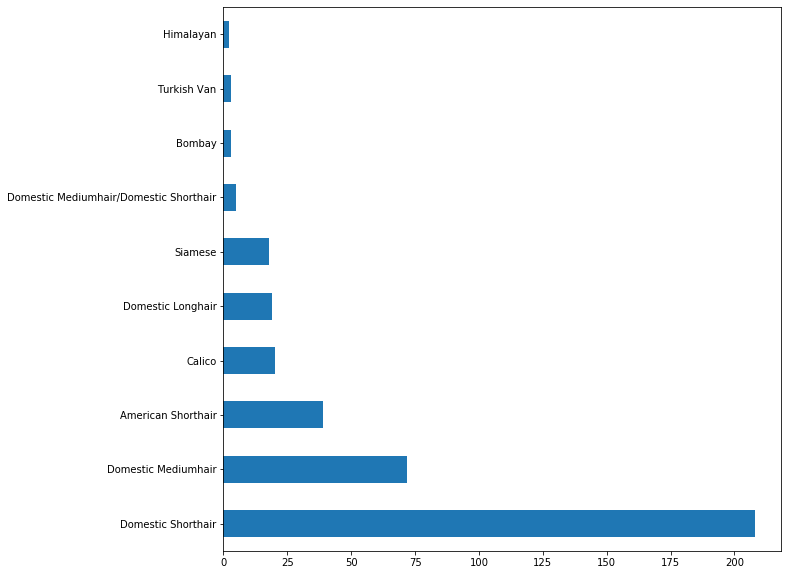

In [24]:
fig1 = df.breed.value_counts()[:10].plot(kind="barh", figsize=(10,10))

In [25]:
# Saving plot figure to .png
# fig = fig1.get_figure()
# fig.savefig('fig1.png', bbox_inches='tight')

In [26]:
df2 = df.groupby(["breed", "sex"])["breed"].count().unstack("sex").fillna(0)

In [27]:
df2["Total"] = df2.sum(axis=1)

In [28]:
df2

sex,Female,Male,Total
breed,,,
Abyssinian,1.0,1.0,2.0
American Bobtail,1.0,0.0,1.0
American Shorthair,16.0,23.0,39.0
American Wirehair,1.0,1.0,2.0
Bombay,1.0,2.0,3.0
British Shorthair,2.0,0.0,2.0
Calico,20.0,0.0,20.0
Domestic Longhair,9.0,10.0,19.0
Domestic Mediumhair,39.0,30.0,69.0


In [29]:
df2 = df2.nlargest(10, "Total")

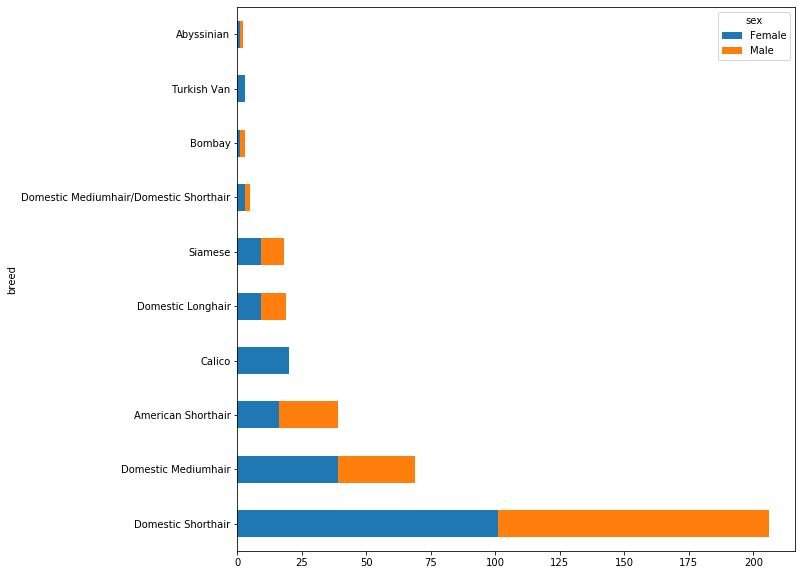

In [30]:
fig2 = df2[["Female","Male"]].plot(kind="barh", stacked="True", figsize=(10,10))

In [31]:
# Saving plot figure to .png
# fig = fig1.get_figure()
# fig.savefig('fig1.png', bbox_inches='tight')

In [32]:
df3 = df.groupby(['breed', 'color', "hair"])['breed'].count().unstack('color').fillna(0)

In [33]:
df3

color                       Black & White or Tuxedo  Black (Mostly)  \
breed               hair                                              
Abyssinian          Long                        1.0             0.0   
                    Short                       0.0             1.0   
American Shorthair  Medium                      0.0             1.0   
                    Short                       4.0             2.0   
American Wirehair   Medium                      0.0             0.0   
Bombay              Medium                      0.0             1.0   
                    Short                       0.0             0.0   
British Shorthair   Short                       0.0             0.0   
Calico              Long                        0.0             0.0   
                    Medium                      0.0             1.0   
                    Short                       0.0             0.0   
Domestic Longhair   Long                        1.0             1.0   
                    Medium                      0.0             0.0   
Domestic Mediumhair Medium                      1.0             1.0   
Domestic Shorthair  Short                       4.0             4.0   
Egyptian Mau        Medium                      0.0             0.0   
Himalayan           Short                       0.0             0.0   
Maine Coon          Long                        0.0             0.0   
Ragdoll             Long                        0.0             0.0   
                    Medium                      0.0             0.0   
Siamese             Long                        0.0             0.0   
                    Medium                      0.0             0.0   
                    Short                       0.0             0.0   
Turkish Van         Long                        1.0             0.0   
                    Medium                      0.0             0.0   

color                       All Black  Brown or Chocolate  \
breed               hair                                    
Abyssinian          Long          0.0                 0.0   
                    Short         0.0                 0.0   
American Shorthair  Medium        2.0                 1.0   
                    Short         1.0                 1.0   
American Wirehair   Medium        0.0                 1.0   
Bombay              Medium        0.0                 0.0   
                    Short         2.0                 0.0   
British Shorthair   Short         0.0                 0.0   
Calico              Long          0.0                 0.0   
                    Medium        0.0                 0.0   
                    Short         0.0                 0.0   
Domestic Longhair   Long          0.0                 0.0   
                    Medium        1.0                 0.0   
Domestic Mediumhair Medium        3.0                 0.0   
Domestic Shorthair  Short         8.0                 2.0   
Egyptian Mau        Medium        0.0                 0.0   
Himalayan           Short         0.0                 0.0   
Maine Coon          Long          0.0                 0.0   
Ragdoll             Long          0.0                 0.0   
                    Medium        0.0                 0.0   
Siamese             Long          0.0                 0.0   
                    Medium        0.0                 1.0   
                    Short         0.0                 1.0   
Turkish Van         Long          0.0                 0.0   
                    Medium        0.0                 0.0   

color                       Calico or Dilute Calico  Gray or Blue  \
breed               hair                                            
Abyssinian          Long                        0.0           0.0   
                    Short                       0.0           0.0   
American Shorthair  Medium                      1.0           0.0   
                    Short                       3.0           2.0   
American Wirehair   

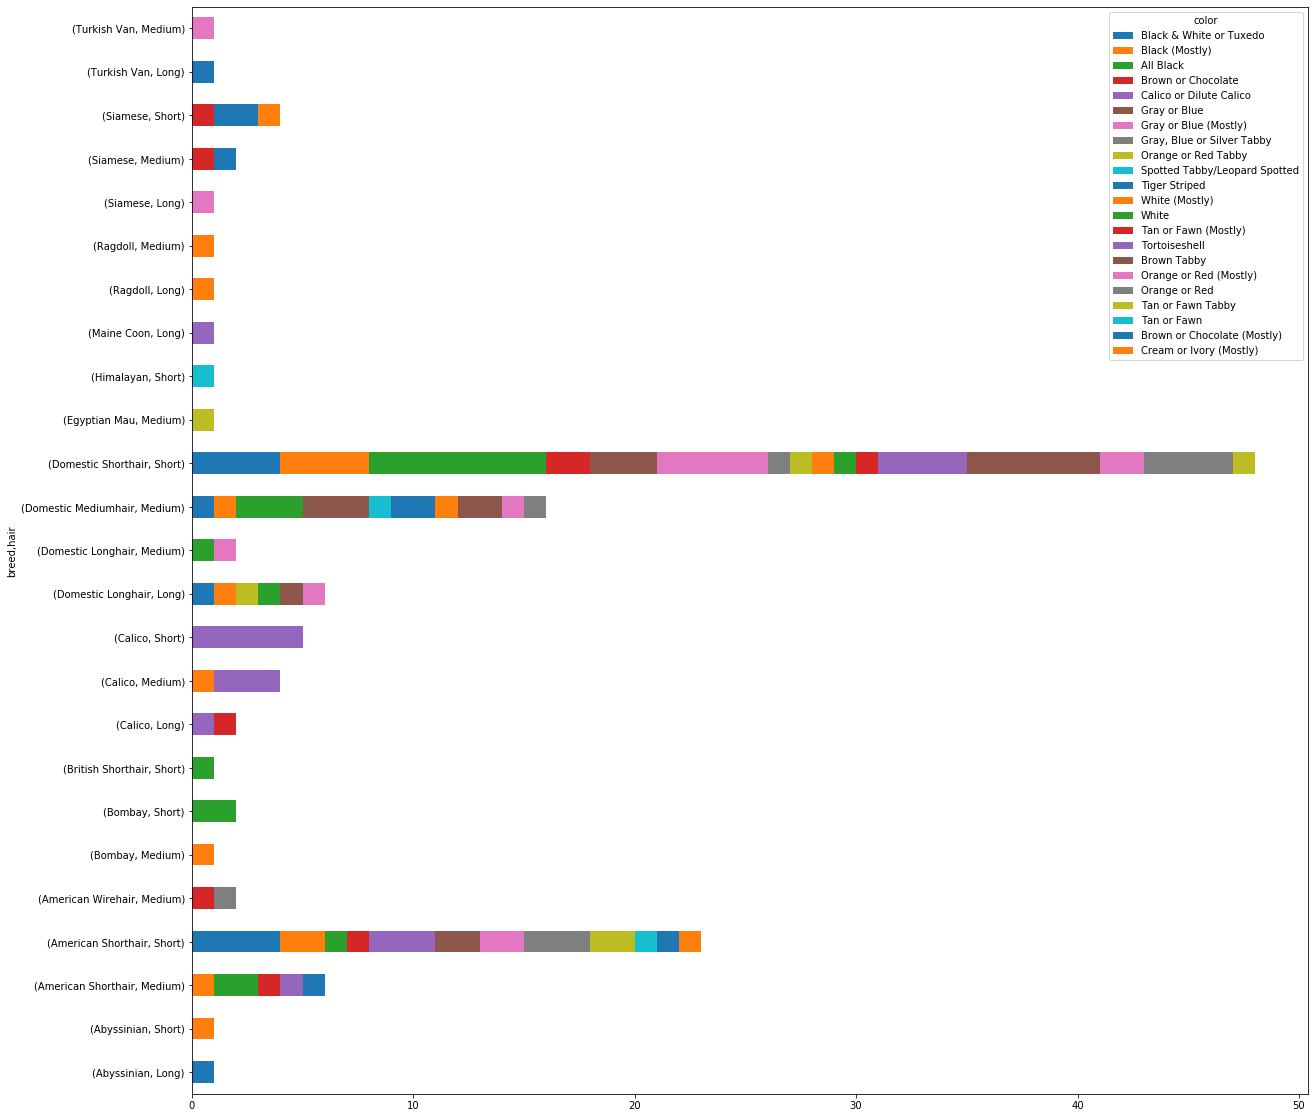

In [34]:
fig3 = df3.plot(kind="barh", stacked="True", figsize=(20,20))

In [35]:
# Saving plot figure to .png
# fig = fig2.get_figure()
# fig.savefig('fig2.png', bbox_inches='tight')